# Boston: A Cold City

## Introduction or Abstract
Something something something

## Methods

## Results

## Conclusion

## Table of Contents
- links?


In [3]:
# All imports go in this block
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

First, we load our weather dataset and prepare it

In [4]:
# Loading data from files goes in this block
#df_311_weather_income = pd.read_csv('data/311_weather_income.csv')

/Users/matt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
df_weather = pd.read_csv("data/weather.csv")

In [28]:
consecutive_snow_days = [0]
days_since_last_snow = [9999]
for index, row in df_weather.iterrows():
    if row['Events'] == 'Snow':
        consecutive_snow_days.append(consecutive_snow_days[-1] + 1)
        days_since_last_snow.append(0)
    else:
        consecutive_snow_days.append(0)
        days_since_last_snow.append(days_since_last_snow[-1] + 1)
df_weather['consecutive_snow_days'] = consecutive_snow_days[1:]
df_weather['days_since_last_snow'] = days_since_last_snow[1:]

In [31]:
df_weather

,Year,Month,Day,High Temp (F),Avg Temp (F),Low Temp (F),High Dew Point (F),Avg Dew Point (F),Low Dew Point (F),High Humidity (%),...,Avg Visibility (mi),Low Visibility (mi),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Snowfall (in),Precip (in),Events,consecutive_snow_days,days_since_last_snow
0,2014,10,1,57,57,56,56,56,55,100,...,4,2,25,16,30,0.00,1.16,Rain,0,10000
1,2014,10,2,56,54,51,56,52,46,100,...,8,2,22,14,28,0.00,0.16,Rain,0,10001
2,2014,10,3,55,52,48,54,50,46,100,...,8,2,14,8,17,0.00,0.01,Rain,0,10002
3,2014,10,4,63,58,53,63,57,53,100,...,4,0,20,8,24,0.00,0.35,Rain,0,10003
4,2014,10,5,61,55,49,59,42,33,97,...,10,10,20,12,24,0.00,0.00,None,0,10004
5,2014,10,6,67,55,43,51,42,38,86,...,10,10,20,8,23,0.00,0.00,None,0,10005
6,2014,10,7,73,64,55,63,57,52,93,...,10,8,30,13,38,0.00,0.01,Rain,0,10006
7,2014,10,8,73,66,58,63,54,40,93,...,10,10,25,14,37,0.00,0.01,Rain,0,10007
8,2014,10,9,66,58,50,43,37,32,61,...,10,10,24,12,31,0.00,0.00,None,0,10008
9,2014,10,10,63,57,51,38,36,35,59,...,10,10,18,10,24,0.00,0.00,None,0,10009


In [32]:
# Load 311 dataset
df_311 = pd.read_csv('data/311.csv')

/Users/matt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
df_311.apply(lambda row: row['open_dt'].year)

KeyError: ('open_dt', 'occurred at index case_enquiry_id')

In [39]:
#pd.merge(df_311, df_weather, left_on)
df_311['open_dt'].to_datetime.apply(lambda x: pd.to_datetime(x).year)

0          2011
1          2011
2          2011
3          2011
4          2011
5          2011
6          2011
7          2011
8          2011
9          2011
10         2011
11         2011
12         2011
13         2011
14         2011
15         2011
16         2011
17         2011
18         2011
19         2011
20         2011
21         2011
22         2011
23         2011
24         2011
25         2011
26         2011
27         2011
28         2011
29         2011
           ... 
1485806    2019
1485807    2019
1485808    2019
1485809    2019
1485810    2019
1485811    2019
1485812    2019
1485813    2019
1485814    2019
1485815    2019
1485816    2019
1485817    2019
1485818    2019
1485819    2019
1485820    2019
1485821    2019
1485822    2019
1485823    2019
1485824    2019
1485825    2019
1485826    2019
1485827    2019
1485828    2019
1485829    2019
1485830    2019
1485831    2019
1485832    2019
1485833    2019
1485834    2019
1485835    2019
Name: open_dt, Length: 1

In [61]:
# Data manipulation: get counts of reports by neighborhood
value_counts = df_311_weather_income["region"].value_counts()
value_counts

Dorchester              18875
Roxbury                 11380
Allston/Brighton         8920
Jamaica Plain            8676
Back Bay/Beacon Hill     7514
West Roxbury             6865
Hyde Park                6698
East Boston              6650
South End                5293
Roslindale               5199
Charlestown              4104
Boston                   2480
Fenway/Kenmore           2438
South Boston              711
Mattapan                  172
Name: region, dtype: int64

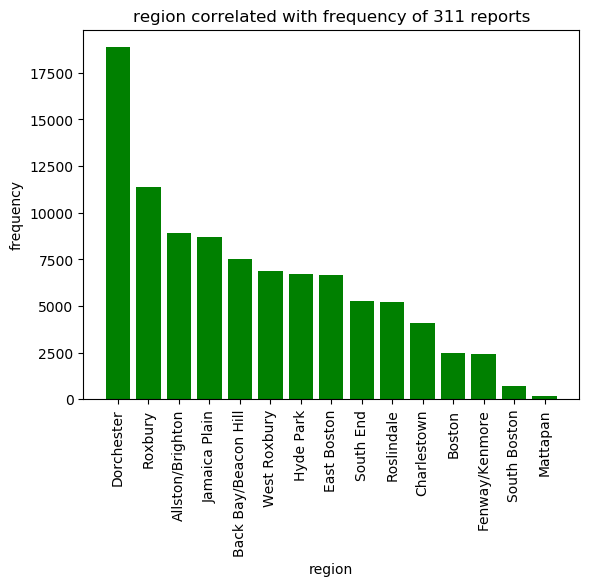

In [65]:
x_pos = np.arange(len(value_counts.keys()))
plt.bar(x_pos, list(value_counts[key] for key in value_counts.keys()), align='center',
        color='green', ecolor='black')
plt.xticks(x_pos, value_counts.keys(), rotation='vertical')
plt.xlabel("region")
plt.ylabel("frequency")
plt.title("region correlated with frequency of 311 reports")
plt.show()

In [47]:
# Data manipulation: get counts of reports by region
value_counts = df_311_weather_income["income"].value_counts()
value_counts

45807    18875
30654    11380
52362     8920
55861     8676
82742     7514
71066     6865
53474     6698
43511     6650
51870     5293
62702     5199
83926     4104
52433     2480
32509     2438
63747      711
42164      172
Name: income, dtype: int64

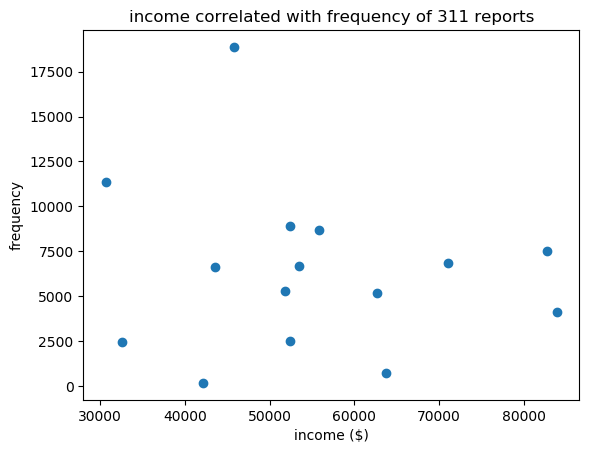

In [60]:
# Plot how many of our reports come from low vs high income areas
plt.scatter(list(map(lambda x: int(x), value_counts.keys())), list(value_counts[key] for key in value_counts.keys()))
plt.xlabel("income ($)")
plt.ylabel("frequency")
plt.title("income correlated with number of 311 reports")
plt.show()

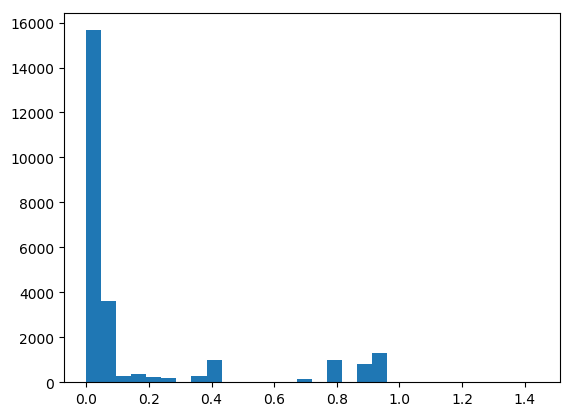

In [86]:
pd.set_option('display.max_columns', None)
plt.hist(df_311_weather_income[df_311_weather_income['type'] == 'Request for Snow Plowing']['Snowfall (in)'], bins=30)

plt.show()

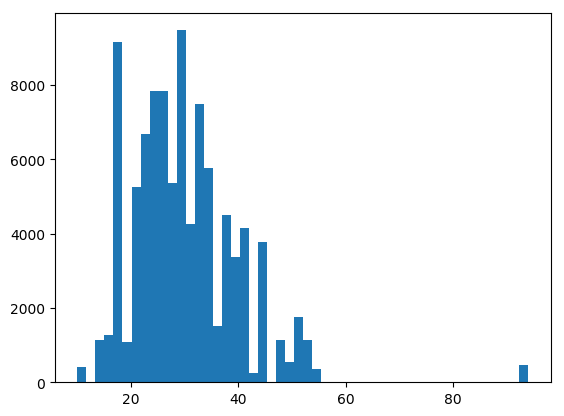

In [71]:
# Data manipulation: Put snowfall into bins
plt.hist(df_311_weather_income['High Wind Gust (mph)'], bins=50)

plt.show()

- Not sure how to normalize our data
- Snow has a delayed effect - requests related to snow can happen the day after it snows

Correlate 311 with demographics (income, race, etc)

In [26]:
df_311_weather_income

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,...,Snowfall (in),Precip (in),Events,new_neighborhood,region,median household income,income,start,consecutive_snow_days,days_since_last_snow
0,0,11,222729,101001209345,2014-11-01 11:39:18,2015-03-01 11:39:17,NaN,OVERDUE,Open,,...,0.00,0.59,Rain,East Boston,East Boston,"$43,511",43511,0,0,10000
1,1,64,233478,101001245542,2015-01-11 15:53:30,2015-01-15 08:30:00,NaN,OVERDUE,Open,,...,0.00,0.00,None,East Boston,East Boston,"$43,511",43511,0,0,10001
2,2,131,238895,101001186634,2014-10-01 11:08:09,2014-10-16 11:08:09,2014-10-01 13:07:48,ONTIME,Closed,Case Closed Case Noted Basket was removed due ...,...,0.00,1.16,Rain,East Boston,East Boston,"$43,511",43511,0,0,10002
3,3,143,238907,101001186665,2014-10-01 11:33:44,NaN,2014-10-07 08:45:02,ONTIME,Closed,Case Closed Case Resolved park fenced off duri...,...,0.00,1.16,Rain,East Boston,East Boston,"$43,511",43511,0,0,10003
4,4,160,238924,101001186718,2014-10-01 12:23:28,2014-10-08 12:23:28,2015-05-08 10:20:53,OVERDUE,Closed,Case Closed. Closed date : 2015-05-08 10:20:53...,...,0.00,1.16,Rain,East Boston,East Boston,"$43,511",43511,0,0,10004
5,5,181,238945,101001186780,2014-10-01 13:48:56,2014-10-08 13:48:56,2015-03-12 10:11:00,OVERDUE,Closed,Case Closed NOVIO: No Violation Found/No Cause,...,0.00,1.16,Rain,East Boston,East Boston,"$43,511",43511,0,0,10005
6,6,205,238969,101001186913,2014-10-01 15:35:30,2014-11-15 15:35:29,2014-11-12 09:45:19,ONTIME,Closed,Case Closed Case Resolved There is an existing...,...,0.00,1.16,Rain,East Boston,East Boston,"$43,511",43511,0,0,10006
7,7,209,238973,101001186919,2014-10-01 15:37:35,NaN,2014-10-27 09:41:41,ONTIME,Closed,Case Closed Case Resolved CLEANED CB 10/21,...,0.00,1.16,Rain,East Boston,East Boston,"$43,511",43511,0,0,10007
8,8,224,238988,101001186976,2014-10-01 16:26:09,NaN,2014-10-07 16:35:31,ONTIME,Closed,Case Closed Bulk Item Automation,...,0.00,1.16,Rain,East Boston,East Boston,"$43,511",43511,0,0,10008
9,9,231,238995,101001187006,2014-10-01 17:34:23,2014-10-06 08:30:00,2014-10-03 09:42:01,ONTIME,Closed,Case Closed Case Noted Nothing out curbside at...,...,0.00,1.16,Rain,East Boston,East Boston,"$43,511",43511,0,0,10009


Look into "Both" - is Both worse than either Rain or Snow

In [ ]:
# What is the average days_since_last_snow for snow removal requests

# 1. filter the table for only entries about snow removal
# 2. for those entries, compute the average of days_since_last_snow